## Exploratory Data Analysis

In [16]:
import json
import pdb
import ast
from tqdm import tqdm
from collections import Counter
import requests

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def read_data(file_name):
    with open(file_name, 'r') as f:
        data = [ast.literal_eval(result) for result in tqdm(f.readlines())]
    return data

works_ = read_data('./data/data.works.2012.v1.txt')
authors_ = read_data('./data/data.authors.2012.v1.txt')
venues_ = read_data('./data/data.venues.2012.v1.txt')
insts_ = read_data('./data/data.insts.2012.v1.txt')

def flatten(list_of_lists, level=2):
    if level == 2:
        flattened_list = [
            j for i in list_of_lists 
                for j in i
        ]
    elif level == 3:
        flattened_list = [
            k for i in list_of_lists
                for j in i
                    for k in j
        ]
    return flattened_list
        
works = pd.DataFrame.from_dict(flatten(works_))
authors = pd.DataFrame.from_dict(flatten(authors_))
venues = pd.DataFrame.from_dict(flatten(venues_))
insts = pd.DataFrame.from_dict(flatten(insts_))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:06<00:00, 36.36it/s]


In [3]:
print (works.shape)
works.head()

(128097, 15)


,id,doi,title,type,publication_date,host_venue,open_access_is_oa,open_access_oa_status,authorships,page_count,cited_by_count,concepts,referenced_works,abstract,counts_by_year
0,W2150066425,https://doi.org/10.1109/cvpr.2012.6248074,Are we ready for autonomous driving? The KITTI...,proceedings-article,2012-06-16,V4306417987,False,closed,"[[A2182886034, [I102335020]], [A2167431718, [I...",-1,6636,"[[C154945302, 0.7994821], [C5799516, 0.7514366...","[W1578985305, W1964814179, W1968799614, W19903...","Today, visual recognition systems are still ra...","[[2022, 570], [2021, 1427], [2020, 1363], [201..."
1,W2158782408,https://doi.org/10.1109/iros.2012.6386109,MuJoCo: A physics engine for model-based control,proceedings-article,2012-12-24,V4306418941,False,closed,"[[A2028747364, [I201448701]], [A2086424281, [I...",-1,2177,"[[C190390380, 0.9146959], [C169590947, 0.71768...","[W154144259, W639693478, W1992116952, W2004116...",We describe a new physics engine tailored to m...,"[[2022, 155], [2021, 616], [2020, 601], [2019,..."
2,W2141125852,https://doi.org/10.1109/cvpr.2012.6248110,Multi-column deep neural networks for image cl...,proceedings-article,2012-06-16,V4306417987,True,green,"[[A1966905718, [I2614128279]], [A2343548174, [...",-1,1970,"[[C190502265, 0.8540422], [C41008148, 0.794758...","[W1601963269, W1968995181, W1987778624, W20268...",Traditional methods of computer vision and mac...,"[[2022, 126], [2021, 237], [2020, 269], [2019,..."
3,W2021851106,https://doi.org/10.1109/iros.2012.6385773,A benchmark for the evaluation of RGB-D SLAM s...,proceedings-article,2012-12-24,V4306418941,True,green,"[[A2973958393, [I62916508]], [A1927103669, [I3...",-1,1901,"[[C31972630, 0.78334284], [C154945302, 0.75840...","[W1514909517, W1556098723, W1656165940, W19652...","In this paper, we present a novel benchmark fo...","[[2022, 142], [2021, 317], [2020, 330], [2019,..."
4,W2100960835,https://doi.org/10.1145/2090236.2090255,Fairness through awareness,proceedings-article,2012-01-08,V4306418069,True,green,"[[A208343995, [I1290206253]], [A2301637896, [I...",-1,1655,"[[C41008148, 0.59133285], [C95623464, 0.542300...","[W178579835, W632002811, W1599656298, W1873763...","We study fairness in classification, where ind...","[[2022, 229], [2021, 453], [2020, 353], [2019,..."


In [4]:
print (venues.shape)
venues.head()

(1713, 9)


,id,display_name,works_count,cited_by_count,is_oa,type,created_date,concepts,counts_by_year
0,V202381698,PLOS ONE,300996,7206361,True,journal,2016-06-24,"[[C86803240, 89.3], [C71924100, 77.4], [C18559...","[[2022, 14277, 818110], [2021, 16714, 1016760]..."
1,V11296630,Journal of the Acoustical Society of America,162791,1306296,False,journal,2016-06-24,"[[C121332964, 91.8], [C24890656, 81.6], [C4100...","[[2022, 1436, 45398], [2021, 2355, 63374], [20..."
2,V168522863,Cancer Research,152472,2712052,False,journal,2016-06-24,"[[C86803240, 98.8], [C54355233, 97.0], [C71924...","[[2022, 7677, 117324], [2021, 3694, 138097], [..."
3,V183492911,Proceedings of SPIE,133134,565093,False,journal,2016-06-24,"[[C121332964, 88.0], [C41008148, 78.7], [C1206...","[[2022, 107, 24323], [2021, 108, 31105], [2020..."
4,V10134376,Sustainability,57942,475877,True,journal,2016-06-24,"[[C86803240, 77.5], [C162324750, 67.6], [C1890...","[[2022, 14165, 161157], [2021, 14235, 141246],..."


In [5]:
print (insts.shape)
insts.head()

(12015, 11)


,id,display_name,country_code,type,homepage_url,works_count,cited_by_count,associated_institutions,concepts,counts_by_year,created_date
0,I100066346,University of Stuttgart,DE,education,http://www.uni-stuttgart.de/home/index.en.html,61357,2825411,"[[I4210113675, child]]","[[C121332964, 70.3], [C127413603, 55.1], [C625...","[[2022, 1858, 181662], [2021, 2942, 236840], [...",2016-06-24
1,I100930933,University College Dublin,IE,education,http://www.ucd.ie/,58631,3042892,"[[I181231927, parent], [I2800368556, related],...","[[C86803240, 62.1], [C71924100, 45.5], [C12133...","[[2022, 2951, 281273], [2021, 4228, 342610], [...",2016-06-24
2,I10091056,Kanazawa University,JP,education,http://www.kanazawa-u.ac.jp/,45655,2647707,"[[I4210104330, related]]","[[C86803240, 75.7], [C71924100, 62.6], [C18559...","[[2022, 1407, 171095], [2021, 2003, 201528], [...",2016-06-24
3,I100005738,Brigham Young University,US,education,http://home.byu.edu/home/,45270,2009099,[],"[[C86803240, 46.8], [C41008148, 45.0], [C12133...","[[2022, 1304, 141077], [2021, 1886, 176453], [...",2016-06-24
4,I101202996,Semmelweis University,HU,education,http://semmelweis.hu/english/the-university/,37862,1700782,[],"[[C71924100, 90.2], [C86803240, 83.4], [C12632...","[[2022, 1475, 154020], [2021, 1882, 178534], [...",2016-06-24


<AxesSubplot:xlabel='month', ylabel='count'>

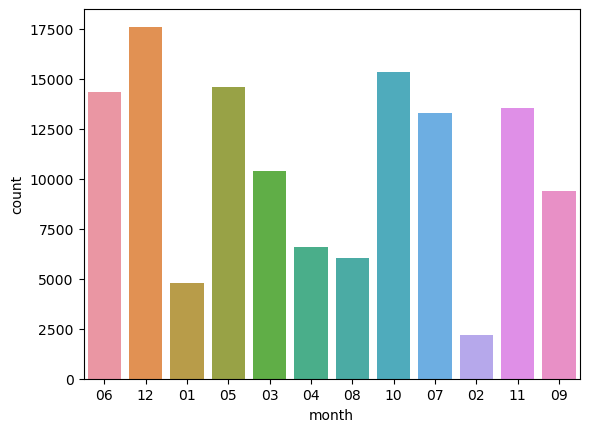

In [6]:
# works by month
works['month'] = works['publication_date'].map(lambda x: x.split('-')[1])
sns.countplot(data=works, x='month')

In [7]:
# no. of unique authors
authors_ = np.unique(flatten(works['authorships'].map(lambda x: [i[0] for i in x]).tolist() ))
len(authors_)

282636

In [8]:
# institutions
insts_ = np.unique(flatten(works['authorships'].map(lambda x: [i[1] for i in x]).tolist(), level=3))
len(insts_)

12015

In [10]:
# host venues
venues_ = np.unique(works['host_venue'].tolist())
len(venues_)

1713

In [11]:
# top-k venues
Counter(works['host_venue'].tolist()).most_common(10)

[('V183492911', 2002),
 ('V4306419201', 1732),
 ('V4306419087', 1131),
 ('V4306417620', 1107),
 ('V4306419991', 1102),
 ('V4306418488', 1070),
 ('V4306419084', 1013),
 ('V4306418043', 988),
 ('V4306419295', 887),
 ('V4306400562', 848)]

In [12]:
# referenced works
ref_works = np.unique([j for i in works['referenced_works'].tolist() for j in i])
len(ref_works)

810375

In [13]:
# works in our data
works_in_df = works['id'].tolist()
len(works_in_df)

128097

In [14]:
# works in common
len(set(works_in_df).intersection(ref_works))

8896

In [ ]:
## Distribution of 2012 CS paper types

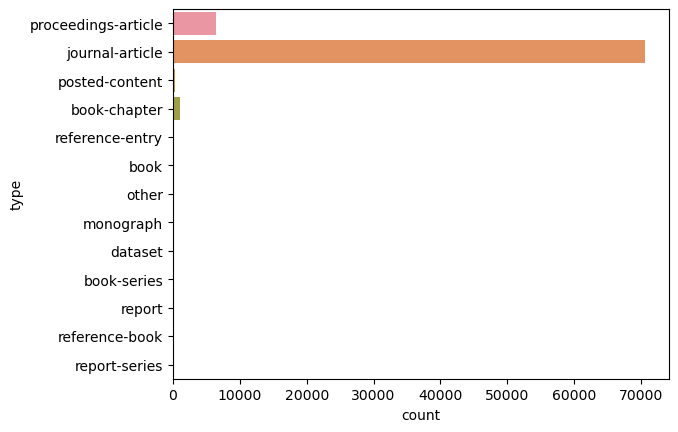

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:16<00:00,  1.37it/s]


Text(0, 0.5, 'Count')

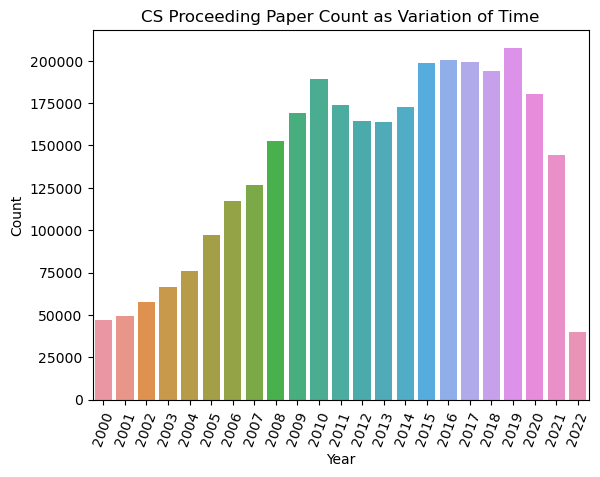

In [17]:
DATA_URL = 'https://api.openalex.org/works?'\
                'filter=from_publication_date:{}-01-01,'\
                'to_publication_date:{}-12-31,'\
                'has_abstract:true,'\
                'has_references:true,'\
                'is_paratext:false,'\
                'is_retracted:false,'\
                'type:proceedings-article,'\
                'concepts.id:C41008148'

papers_over_years = []
years = list(range(2000, 2023))
for year_i in tqdm(years):
    try:
        response = requests.get(DATA_URL.format(year_i, year_i)).json()
        counts = response['meta']['count']
        papers_over_years.append(counts)
    except Exception as err:
        print (err)
        print (response)
        break

sns.barplot(x=years, y=papers_over_years)
plt.gca().set_title("CS Proceeding Paper Count as Variation of Time")
plt.xticks(rotation=70)
plt.gca().set_xlabel("Year")
plt.gca().set_ylabel("Count")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:20<00:00,  1.13it/s]


Text(0, 0.5, 'Count')

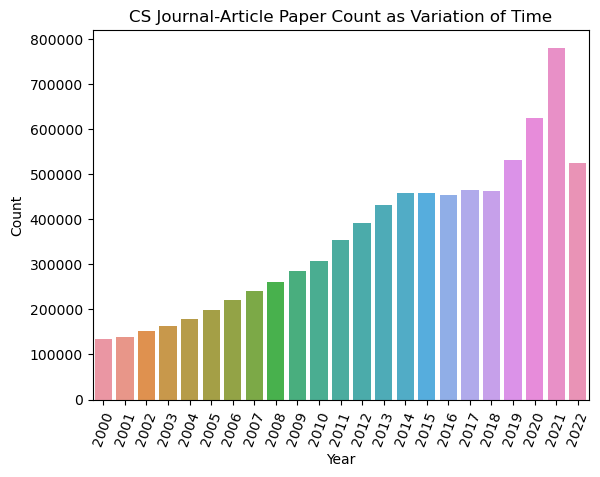

In [18]:
DATA_URL = 'https://api.openalex.org/works?'\
                'filter=from_publication_date:{}-01-01,'\
                'to_publication_date:{}-12-31,'\
                'has_abstract:true,'\
                'has_references:true,'\
                'is_paratext:false,'\
                'is_retracted:false,'\
                'type:journal-article,'\
                'concepts.id:C41008148'

papers_over_years = []
years = list(range(2000, 2023))
for year_i in tqdm(years):
    try:
        response = requests.get(DATA_URL.format(year_i, year_i)).json()
        counts = response['meta']['count']
        papers_over_years.append(counts)
    except Exception as err:
        print (err)
        print (response)
        break

sns.barplot(x=years, y=papers_over_years)
plt.xticks(rotation=70)
plt.gca().set_title("CS Journal-Article Paper Count as Variation of Time")
plt.gca().set_xlabel("Year")
plt.gca().set_ylabel("Count")